# Campaign 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

os.chdir(r'C:\Users\mrram\OneDrive - University of Arizona\Research Phase II\PhaseI Paper')

data = pd.read_csv('./Data/candidates_camp1DD.csv', skiprows=1, header=None)

Res_Con = np.array([5, 4, 1, 3], dtype=float)
vol2rat = data.iloc[:, :4].mul(Res_Con).div(330)

column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Conductivity']
data.columns = column_names[:5] + list(data.columns[5:])
vol2rat.columns = column_names[:4]

data['Iteration'] = np.arange(1, len(data) + 1)

# gaps/spaced x exactly as before 
gap_positions = [61, 91]
gap_width = 2
spaced_x = []
for i in range(len(data)):
    num_gaps_before = sum([i + 1 > b for b in gap_positions])
    spaced_x.append(data.loc[i, 'Iteration'] + gap_width * num_gaps_before)
data['Spaced_X'] = spaced_x


actual_names = {
    'Molar_Ratio_1': r'NaCl',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'MgCl$_2$',
    'Molar_Ratio_4': r'CaCl$_2$'
}
colours = ["#6992BB",  # softened blue
           "#CCBB44",  # unchanged yellow
           "#BB5C92",  # softened magenta
           "#4EA05C"]  # wine purple

# Fonts and sizes
fig, ax1 = plt.subplots(figsize=(16, 11), dpi=800)
labelsize = 26
legsize = 19.5
ticksize = 23

# left axis
stack_cols = list(vol2rat.columns)

bottom = np.zeros(len(vol2rat), dtype=float)
bar_width = 0.8
bar_containers = []
for idx, col in enumerate(stack_cols):
    bc = ax1.bar(
        data['Spaced_X'],
        vol2rat[col].to_numpy(),
        width=bar_width,
        bottom=bottom,
        color=colours[idx],
        edgecolor='white',
        linewidth=0.5,
        zorder=2
    )
    bar_containers.append(bc)
    bottom = bottom + vol2rat[col].to_numpy()

vol2rat['Total_Concent'] = vol2rat.sum(axis=1)

idx = np.arange(10, len(data['Spaced_X'])+1, 10)
idx = np.insert(idx, 0, 1)
if idx[-1] != len(data['Spaced_X']):
    idx = np.append(idx, len(data['Spaced_X']))

ax1.set_xlabel('Iteration', fontsize=labelsize)
ax1.set_ylabel('Total concentration (M)', fontsize=labelsize, labelpad=15)
ax1.set_xticks(data['Spaced_X'].iloc[idx-1])
ax1.set_xticklabels(data['Iteration'].iloc[idx-1])
ax1.set_yticks(np.arange(0, vol2rat['Total_Concent'].max() + 1, 0.5))
ax1.tick_params(axis='both', labelsize=ticksize)

# right axis
ax2 = ax1.twinx()
ionic_handle, = ax2.plot(
    data['Spaced_X'],
    data['Conductivity'],
    color='black',
    marker='P',
    markersize=12,
    linestyle='--',
    linewidth=1.5,
    zorder=4
)
ax2.set_ylabel('Ionic conductivity', labelpad=5)

# Highlight Maxima
highlight_points = [(59, 'blue'), (68, 'orange')]
for it, col in highlight_points:
    i = data.index[data['Iteration'] == it][0]
    ax2.scatter(
        data.at[i, 'Spaced_X'],
        data.at[i, 'Conductivity'] + 0.08,
        edgecolors=col,
        facecolors='none',
        linewidths=3.5,
        marker='^',
        s=300,
        zorder=5,
        label='_nolegend_'
    )

ax2.set_ylabel(r'Ionic conductivity ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)
ax2.tick_params(axis='y', labelsize=ticksize)
ax2.set_yticks(np.arange(np.floor(data[column_names[4]]).min(), data[column_names[4]].max() + 3, 2)) # NEWWW, REMOVE IF NOT D_OPTIMAL

# legends 
salt_patches = [Patch(facecolor=colours[i], edgecolor='white', label=actual_names[c])
                for i, c in enumerate(stack_cols)]
legend_salts = ax1.legend(
    salt_patches,
    [p.get_label() for p in salt_patches],
    loc='upper left',
    bbox_to_anchor=(-0.001, 1),
    ncol=4,
    fontsize=legsize-1.5,
    framealpha=1,
    borderaxespad=0,
    handletextpad=0.6,
    markerscale=2,
)
ax1.add_artist(legend_salts)

# Secondary legend for conductivity
legend_other = ax1.legend(
    [ionic_handle],
    ['Ionic conductivity'],
    loc='upper left',
    bbox_to_anchor=(-0.005, 0.962),
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    frameon=False,
)


ax1.grid(axis='y', linestyle=':', linewidth=0.7)
plt.xlim(min(data['Spaced_X']) - 1, max(data['Spaced_X']) + 1)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


# D-Optimal

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os

os.chdir(r'C:\Users\mrram\OneDrive - University of Arizona\Research Phase II\PhaseI Paper')

data = pd.read_csv('./Data/candidates_DOptimal.csv', skiprows=1, header=None)

Res_Con = np.array([5, 4, 1, 3], dtype=float)
vol2rat = data.iloc[:, :4].mul(Res_Con).div(330)

column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Conductivity']
data.columns = column_names[:5] + list(data.columns[5:])
vol2rat.columns = column_names[:4]

data['Iteration'] = np.arange(1, len(data) + 1)

gap_positions = []
gap_width = 2
spaced_x = []
for i in range(len(data)):
    num_gaps_before = sum([i + 1 > b for b in gap_positions])
    spaced_x.append(data.loc[i, 'Iteration'] + gap_width * num_gaps_before)
data['Spaced_X'] = spaced_x


actual_names = {
    'Molar_Ratio_1': r'NaCl',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'MgCl$_2$',
    'Molar_Ratio_4': r'CaCl$_2$'
}
colours = ["#6992BB",  # softened blue
           "#CCBB44",  # unchanged yellow
           "#BB5C92",  # softened magenta
           "#4EA05C"]  # wine purple

# Fonts and sizes
fig, ax1 = plt.subplots(figsize=(16, 11), dpi=800)
labelsize = 26
legsize = 19.5
ticksize = 23

# left axis
stack_cols = list(vol2rat.columns)

bottom = np.zeros(len(vol2rat), dtype=float)
bar_width = 0.8
bar_containers = []
for idx, col in enumerate(stack_cols):
    bc = ax1.bar(
        data['Spaced_X'],
        vol2rat[col].to_numpy(),
        width=bar_width,
        bottom=bottom,
        color=colours[idx],
        edgecolor='white',
        linewidth=0.5,
        zorder=2
    )
    bar_containers.append(bc)
    bottom = bottom + vol2rat[col].to_numpy()

vol2rat['Total_Concent'] = vol2rat.sum(axis=1)

idx = np.arange(10, len(data['Spaced_X'])+1, 10)
idx = np.insert(idx, 0, 1)
if idx[-1] != len(data['Spaced_X']):
    idx = np.append(idx, len(data['Spaced_X']))

ax1.set_xlabel('Iteration', fontsize=labelsize)
ax1.set_ylabel('Total concentration (M)', fontsize=labelsize, labelpad=15)
ax1.set_xticks(data['Spaced_X'].iloc[idx-1])
ax1.set_xticklabels(data['Iteration'].iloc[idx-1])
ax1.set_yticks(np.arange(0, vol2rat['Total_Concent'].max() + 1, 0.5))
ax1.tick_params(axis='both', labelsize=ticksize)

# right axis
ax2 = ax1.twinx()
ionic_handle, = ax2.plot(
    data['Spaced_X'],
    data['Conductivity'],
    color='black',
    marker='P',
    markersize=12,
    linestyle='--',
    linewidth=1.5,
    zorder=4
)
ax2.set_ylabel('Ionic conductivity', labelpad=5)

# Highlight Maxima
highlight_points = [(41, 'blue'), (17, 'orange')]
for it, col in highlight_points:
    i = data.index[data['Iteration'] == it][0]
    ax2.scatter(
        data.at[i, 'Spaced_X'],
        data.at[i, 'Conductivity'] + 0.08,
        edgecolors=col,
        facecolors='none',
        linewidths=3.5,
        marker='^',
        s=300,
        zorder=5,
        label='_nolegend_'
    )

ax2.set_ylabel(r'Ionic conductivity ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)
ax2.tick_params(axis='y', labelsize=ticksize)
ax2.set_yticks(np.arange(np.floor(data[column_names[4]]).min(), data[column_names[4]].max() + 3, 2)) # NEWWW, REMOVE IF NOT D_OPTIMAL

# legends 
salt_patches = [Patch(facecolor=colours[i], edgecolor='white', label=actual_names[c])
                for i, c in enumerate(stack_cols)]
legend_salts = ax1.legend(
    salt_patches,
    [p.get_label() for p in salt_patches],
    loc='upper left',
    bbox_to_anchor=(-0.001, 1),
    ncol=4,
    fontsize=legsize-1.5,
    framealpha=1,
    borderaxespad=0,
    handletextpad=0.6,
    markerscale=2,
)
ax1.add_artist(legend_salts)

# Secondary legend for conductivity
legend_other = ax1.legend(
    [ionic_handle],
    ['Ionic conductivity'],
    loc='upper left',
    bbox_to_anchor=(-0.005, 0.962),
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    frameon=False,
)


ax1.grid(axis='y', linestyle=':', linewidth=0.7)
plt.xlim(min(data['Spaced_X']) - 1, max(data['Spaced_X']) + 1)
plt.tight_layout(rect=[0, 0, 1, 1.14])  #[0, 0, 1, 0.94]
plt.show()


# Camp 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


data = pd.read_csv('./Data/candidates_camp2DD.csv', skiprows=1, header=None)

Res_Con = np.array([5, 4, 4, 2, 0.5], dtype=float)
vol2rat = data.iloc[:, :5].mul(Res_Con).div(330)

column_names = [
    'Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3',
    'Molar_Ratio_4', 'Molar_Ratio_5', 'Conductivity'
]
data.columns = column_names
vol2rat.columns = column_names[:5]

data['Iteration'] = np.arange(1, len(data) + 1)
gap_positions = [70, 100]
gap_width = 2
spaced_x = []
for i in range(len(data)):
    num_gaps_before = sum([i + 1 > b for b in gap_positions])
    spaced_x.append(data.loc[i, 'Iteration'] + gap_width * num_gaps_before)
data['Spaced_X'] = spaced_x

actual_names = {
    'Molar_Ratio_1': r'ZnCl$_2$',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'NH$_4$Cl',
    'Molar_Ratio_4': r'NaCl',
    'Molar_Ratio_5': r'EMIMCl'
}
colours = [
    "#C94C4C",  # coral red
    "#5FAF5F",  # fresher green
    "#B466CC",  # medium violet
    "#E9963A",  # amber-orange
    "#355C8C"   # calmer blue
]

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 11), dpi=800)
labelsize = 26
legsize   = 19.5
ticksize  = 23

# left axis
stack_cols = list(vol2rat.columns)
bottom = np.zeros(len(vol2rat), dtype=float)
bar_width = 0.8
for idx, col in enumerate(stack_cols):
    ax1.bar(
        data['Spaced_X'],
        vol2rat[col].to_numpy(),
        width=bar_width,
        bottom=bottom,
        color=colours[idx],
        edgecolor='white',
        linewidth=0.5,
        zorder=2
    )
    bottom = bottom + vol2rat[col].to_numpy()


vol2rat['Total_Concent'] = vol2rat.sum(axis=1)

# Axis 1 labels and ticks
ax1.set_xlabel('Iteration', fontsize=labelsize)
ax1.set_ylabel('Total concentration (M)', fontsize=labelsize, labelpad=15)
ax1.set_xticks(data['Spaced_X'][::10])
ax1.set_xticklabels(data['Iteration'][::10])
ax1.set_yticks(np.arange(0, vol2rat['Total_Concent'].max() + 1, 0.5))
ax1.tick_params(axis='both', labelsize=ticksize)

# Secondary axis: conductivity line
ax2 = ax1.twinx()
ionic_handle, = ax2.plot(
    data['Spaced_X'],
    data['Conductivity'],
    color='black',
    marker='P',
    markersize=12,
    linestyle='--',
    linewidth=1.5,
    zorder=4
)
ax2.set_ylabel('Ionic conductivity', labelpad=5)



highlight_points = [(72, 'orange'), (107, 'blue')]
for it, col in highlight_points:
    i = data.index[data['Iteration'] == it][0]
    ax2.scatter(
        data.at[i, 'Spaced_X'],
        data.at[i, 'Conductivity'] + 0.08,
        edgecolors=col,
        facecolors='none',
        linewidths=2.5,
        marker='^',
        s=200,
        zorder=5,
        label='_nolegend_'
    )

ax2.set_ylabel(r'Ionic conductivity ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)
ax2.tick_params(axis='y', labelsize=ticksize)

# Legends
salt_patches = [Patch(facecolor=colours[i], edgecolor='white', label=actual_names[c])
                for i, c in enumerate(stack_cols)]

legend_salts = ax1.legend(
    salt_patches,
    [p.get_label() for p in salt_patches],
    loc='upper left',
    bbox_to_anchor=(0, 1),
    ncol=5,
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    handletextpad=0.6,
    labelspacing=0.5,
    borderpad=0.4
)
ax1.add_artist(legend_salts)

legend_other = ax1.legend(
    [ionic_handle],
    ['Ionic conductivity'],
    loc='upper left',
    bbox_to_anchor=(0.0, 0.945),
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    frameon=False,
    handletextpad=0.6
)

ax1.grid(axis='y', linestyle=':', linewidth=0.7)
plt.xlim(min(data['Spaced_X']) - 1, max(data['Spaced_X']) + 1)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


# D-Optimal Histogram

D-optimal median: 20.83153883
BO Campaign 1 median: 23.086293950299734


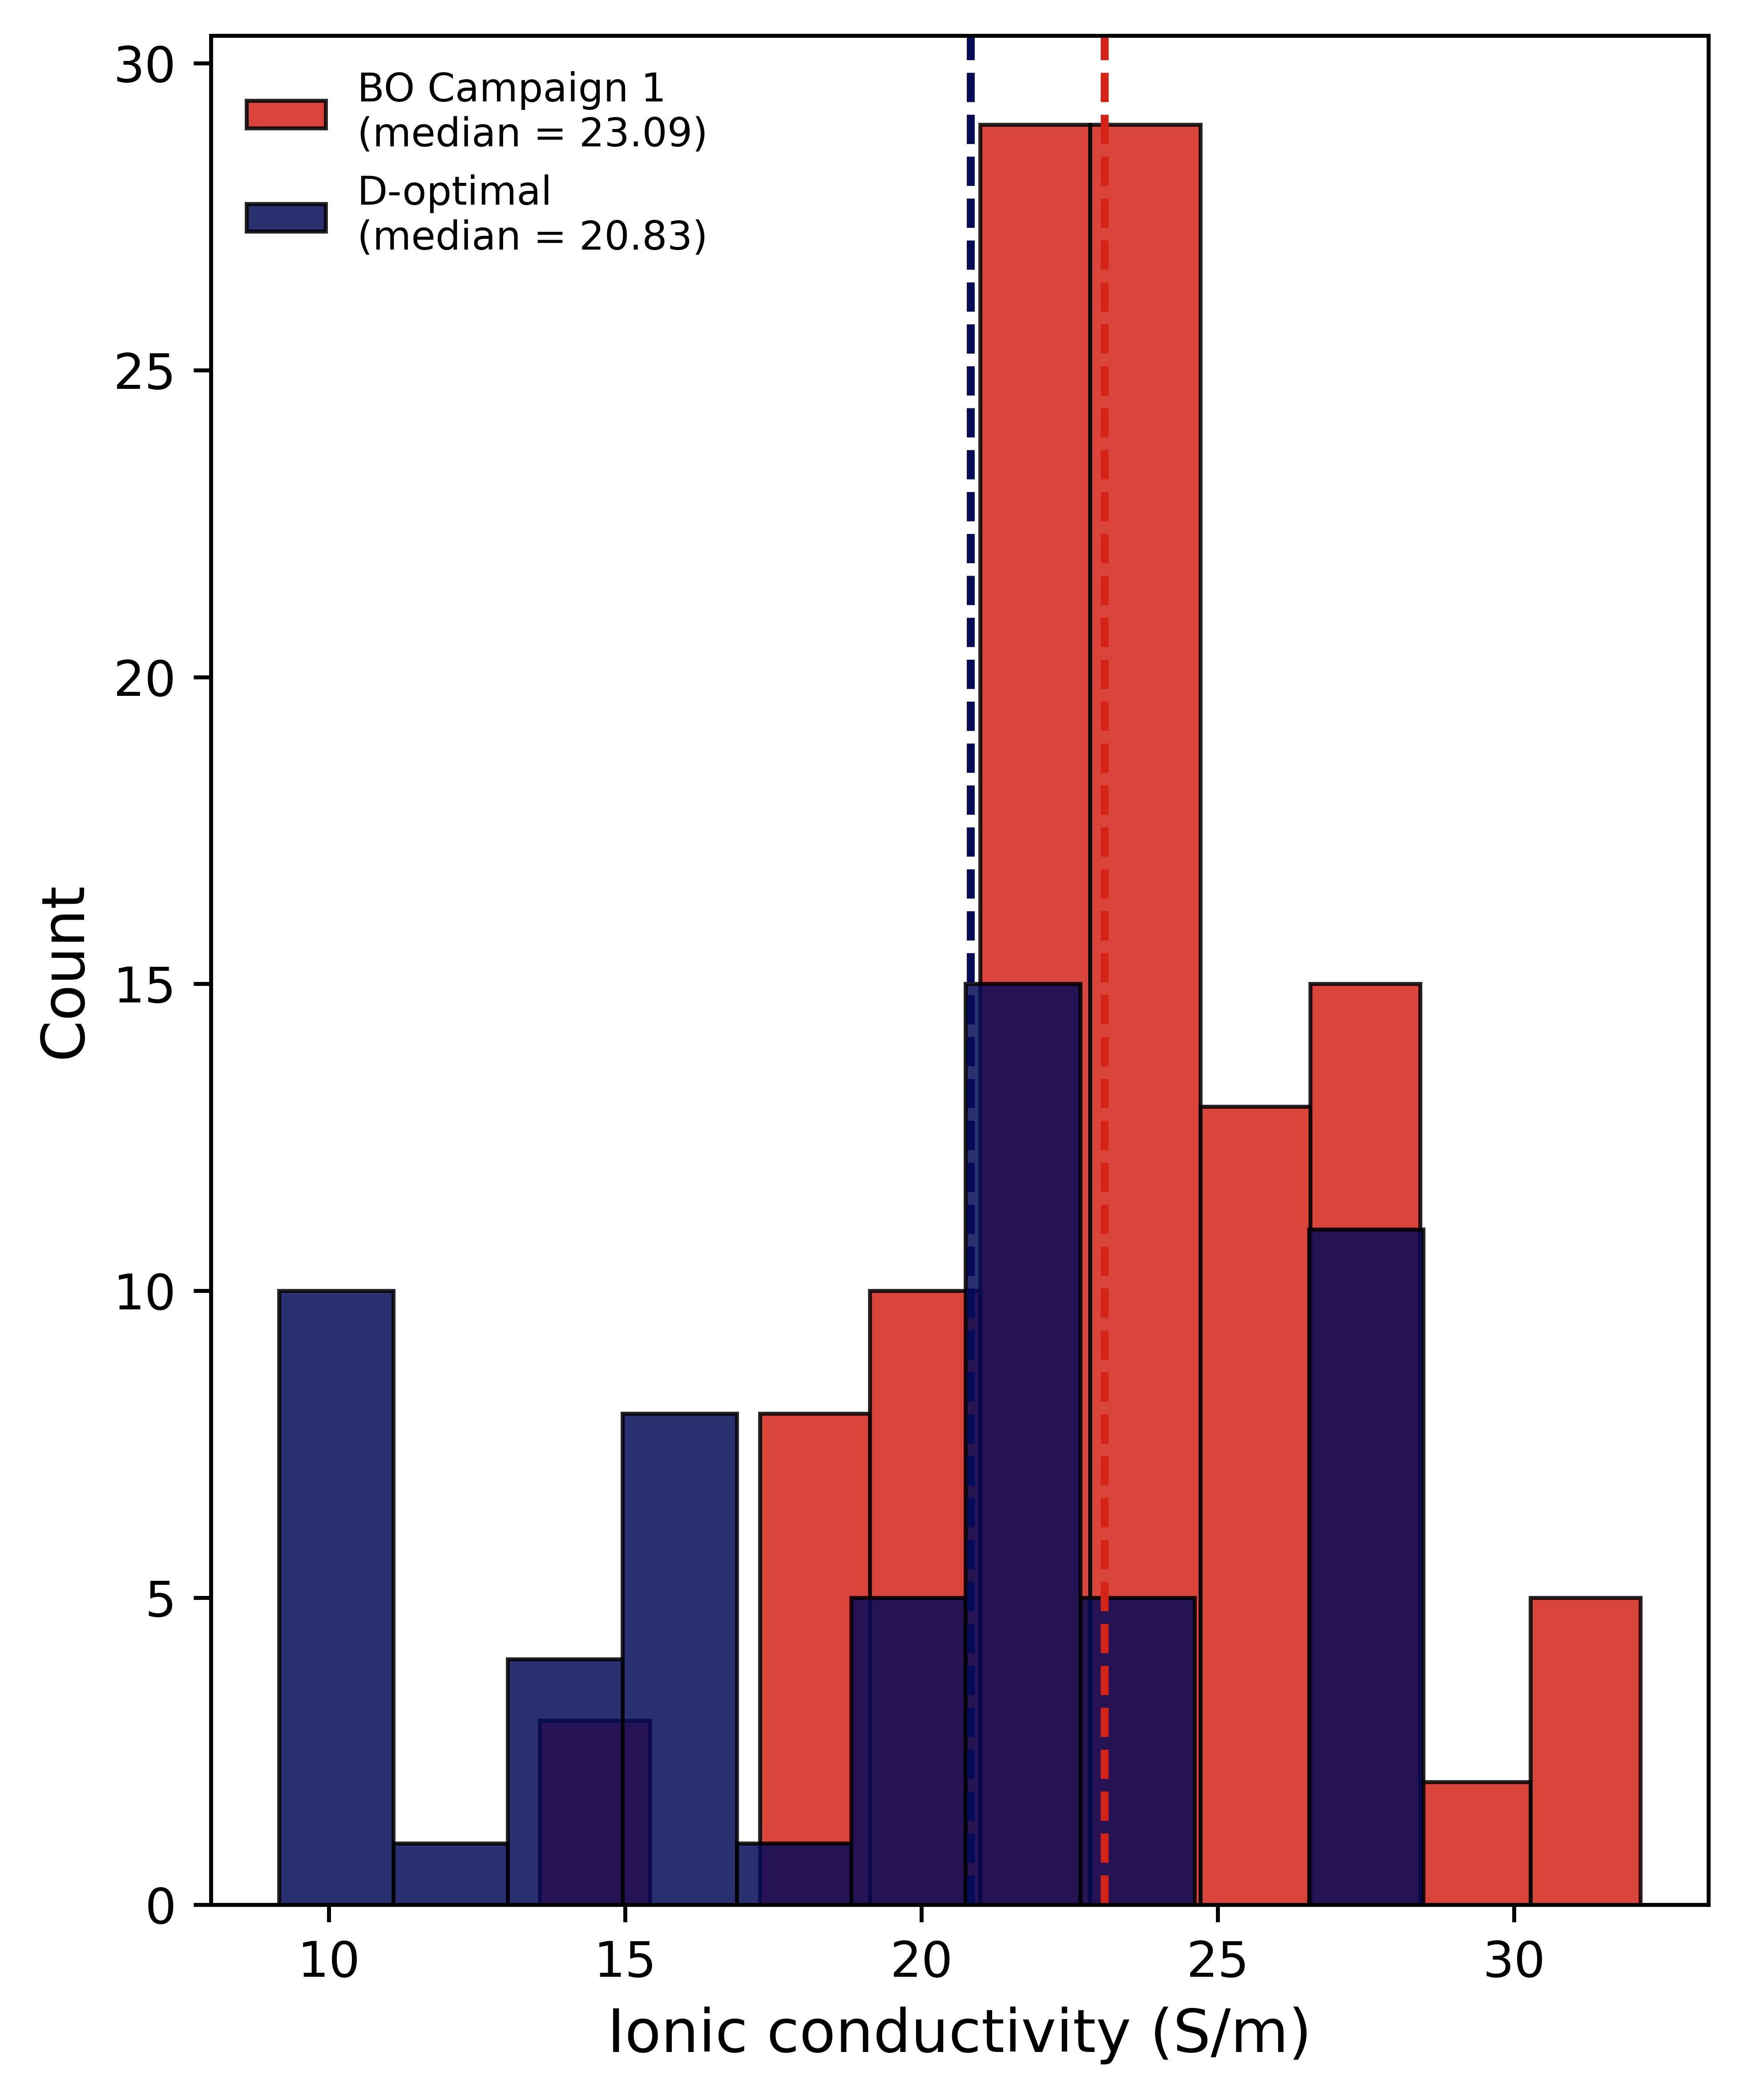

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load data
os.chdir(r'C:\Users\mrram\OneDrive - University of Arizona\Research Phase II\PhaseI Paper')
df_do = pd.read_csv('./Data/candidates_DOptimal.csv')
df_bo = pd.read_csv('./Data/candidates_camp1DD.csv')

y_do = df_do["y1"]
y_bo = df_bo["objective_1"]
median_do = y_do.median()
median_bo = y_bo.median()

labelsize = 12
legsize = 8

print("D-optimal median:", median_do)
print("BO Campaign 1 median:", median_bo)

fig, ax = plt.subplots(figsize=(5, 6), dpi=800)

color_do = "#050B58" 
color_bo = "#d42317"

ax.axvline(median_do, color=color_do, linestyle="--", linewidth=1.6)
ax.axvline(median_bo, color=color_bo, linestyle="--", linewidth=1.6)

ax.hist(y_bo,
        bins=10,
        color=color_bo,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.8,
        label=f"BO Campaign 1\n(median = {median_bo:.2f})")

ax.hist(y_do,
        bins=10,
        color=color_do,
        alpha=0.85,
        edgecolor="black",
        linewidth=0.8,
        label=f"D-optimal\n(median = {median_do:.2f})")

ax.set_xlabel("Ionic conductivity (S/m)", fontsize = labelsize)
ax.set_ylabel("Count", fontsize = labelsize)
ax.legend(frameon=False, fontsize = legsize)

plt.tight_layout()
plt.show()
